In [5]:
import pandas as pd
import numpy as np
import quandl
import math
import requests
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn import preprocessing,model_selection, svm
from sklearn.linear_model import LinearRegression
quandl.ApiConfig.api_key = open("quand.txt", 'r').read()

In [6]:
df = quandl.get('BSE/BOM539871')    # Getting the Thyrocare stock prices in Bombay stock Exchange

In [10]:
df_new = df[['Open', 'High', 'Low', 'Close', 'No. of Shares']] #Creating new dataframe with only selected columns


In [11]:
df_new['Avg HL pct'] =( df_new['High'] - df_new['Low'] )*100.0/df_new['Low']
df_new['Avg OC pct'] =( df_new['Close'] - df_new['Open'] )*100.0/df_new['Open']

df_new = df_new[['Close', 'Avg HL pct', 'Avg OC pct', 'No. of Shares']].rename({'No. of Shares': 'Volume'})
df_new.head()



/home/varun_nelakanti/.virtualenvs/ML_sentDex/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/varun_nelakanti/.virtualenvs/ML_sentDex/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Avg HL pct,Avg OC pct,No. of Shares
Date,,,,
2017-02-21,710.70,1.614969,-0.042194,4693.0
2017-02-22,711.85,2.049296,-0.676713,4769.0
2017-02-23,709.45,0.988701,-0.372139,96952.0
2017-02-27,702.00,1.394850,-0.854459,6165.0
2017-02-28,697.05,1.344067,-0.157559,2211.0


In [12]:
df_new.fillna(-999999, inplace = True)

forecast_column = 'Close'

forecast_out = int(math.ceil(0.01*len(df_new)))

df_new['label'] = df_new[forecast_column].shift(-forecast_out)
df_new.tail()

,Close,Avg HL pct,Avg OC pct,No. of Shares,label
Date,,,,,
2020-08-19,783.55,4.449438,-0.564721,30155.0,NaN
2020-08-20,792.45,6.772727,1.336317,24543.0,NaN
2020-08-21,786.90,2.492192,-0.700360,11085.0,NaN
2020-08-24,804.45,4.276730,1.061558,23349.0,NaN
2020-08-25,775.60,5.703125,-3.574315,16165.0,NaN


In [17]:
#Feature are always capital X

X = np.array(df_new.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df_new.dropna(inplace=True)

y = np.array(df_new['label'])
#y= y[:-forecast_out]

# print(len(X), len(y))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)
forecast_array  = clf.predict(X_lately)

print(forecast_array, accuracy, forecast_out)

ValueError: Found input variables with inconsistent numbers of samples: [849, 858]

In [14]:
df_new.tail()

,Close,Avg HL pct,Avg OC pct,No. of Shares,label
Date,,,,,
2020-08-06,702.70,4.236475,3.035191,20237.0,783.55
2020-08-07,699.85,1.662010,-1.011315,8808.0,792.45
2020-08-10,711.40,4.393214,0.204240,11181.0,786.90
2020-08-11,703.10,2.441113,-1.705578,9186.0,804.45
2020-08-12,703.65,4.826381,-0.614407,6071.0,775.60


In [18]:
style.use('ggplot')
df_new['Forecast'] = np.nan

last_date = df_new.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_array:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df_new.loc[next_date] = [np.nan for _ in range(len(df_new.columns) -1)] + [i]
    
df_new.tail(10)

,Close,Avg HL pct,Avg OC pct,No. of Shares,label,Forecast
Date,,,,,,
2020-08-12 00:00:00,703.65,4.826381,-0.614407,6071.0,775.6,NaN
2020-08-13 05:30:00,NaN,NaN,NaN,NaN,NaN,698.317935
2020-08-14 05:30:00,NaN,NaN,NaN,NaN,NaN,698.036206
2020-08-15 05:30:00,NaN,NaN,NaN,NaN,NaN,824.159184
2020-08-16 05:30:00,NaN,NaN,NaN,NaN,NaN,787.366206
2020-08-17 05:30:00,NaN,NaN,NaN,NaN,NaN,775.941576
2020-08-18 05:30:00,NaN,NaN,NaN,NaN,NaN,784.252233
2020-08-19 05:30:00,NaN,NaN,NaN,NaN,NaN,777.657099
2020-08-20 05:30:00,NaN,NaN,NaN,NaN,NaN,794.089678


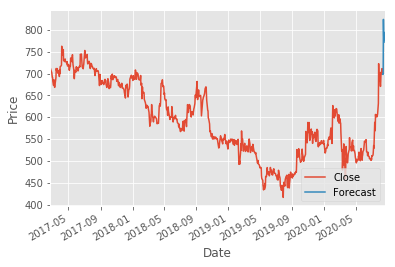

In [19]:
df_new['Close'].plot()
df_new['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

KeyError: 'Forecast'

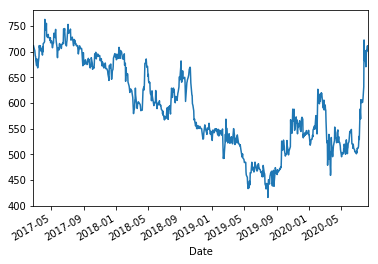